<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> 
        <h1>RNNs for Timeseries Analysis</h1>
        <h1>Timeseries</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
        @bgoncalves, @data4sci</p></div>
</div>

In [1]:
from collections import Counter
from pprint import pprint

import pandas as pd
from pandas.plotting import autocorrelation_plot

from sklearn.linear_model import LinearRegression

import numpy as np
import matplotlib.pyplot as plt 

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

json      2.0.9
autopep8  1.5
numpy     1.18.1
watermark 2.0.2
pandas    1.0.1
Thu Mar 05 2020 

CPython 3.7.3
IPython 6.2.1

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.3.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   : 23641f79fd0133807880f00fa91a35bb9385f9f8


Load default figure style

In [3]:
plt.style.use('./d4sci.mplstyle')

## Load the dataset
GDP data from the Federal Reserve Bank [website](https://fred.stlouisfed.org/series/GDP)

In [4]:
series = pd.read_csv('data/GDP.csv', header=0, parse_dates=[0], index_col=0)

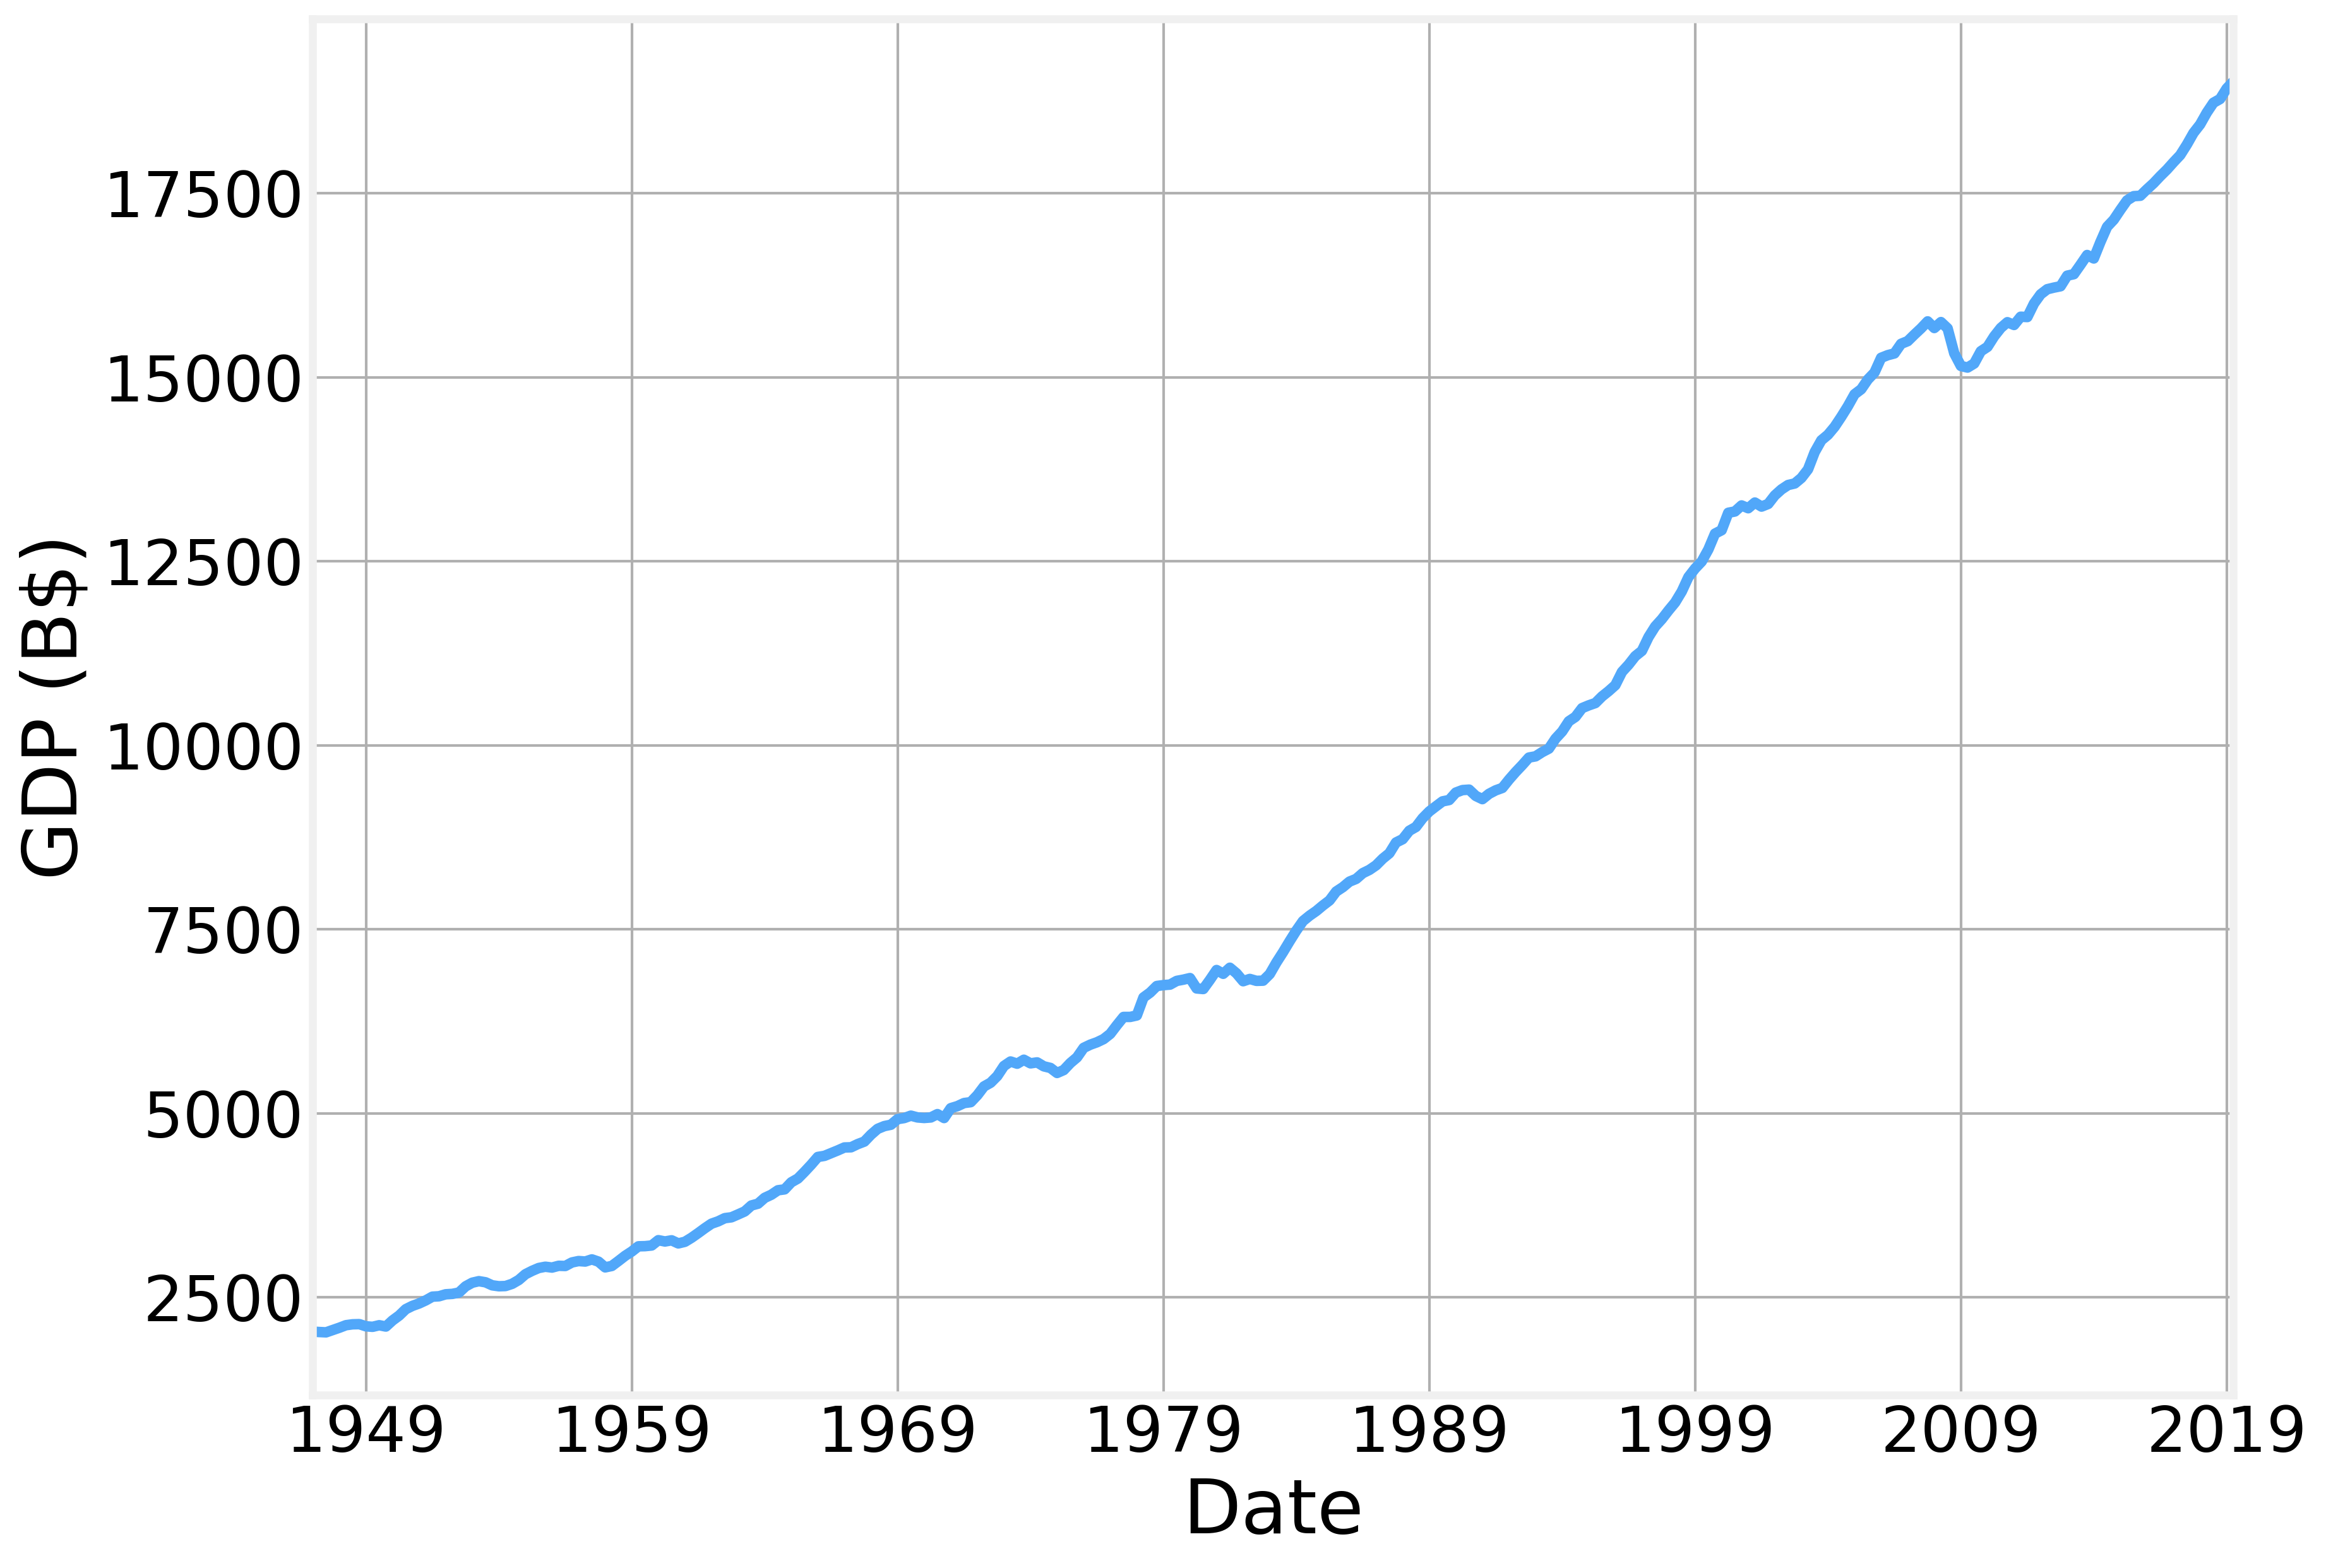

In [5]:
ax = series.plot(legend=False)
ax.set_xlabel('Date')
ax.set_ylabel('GDP (B$)');

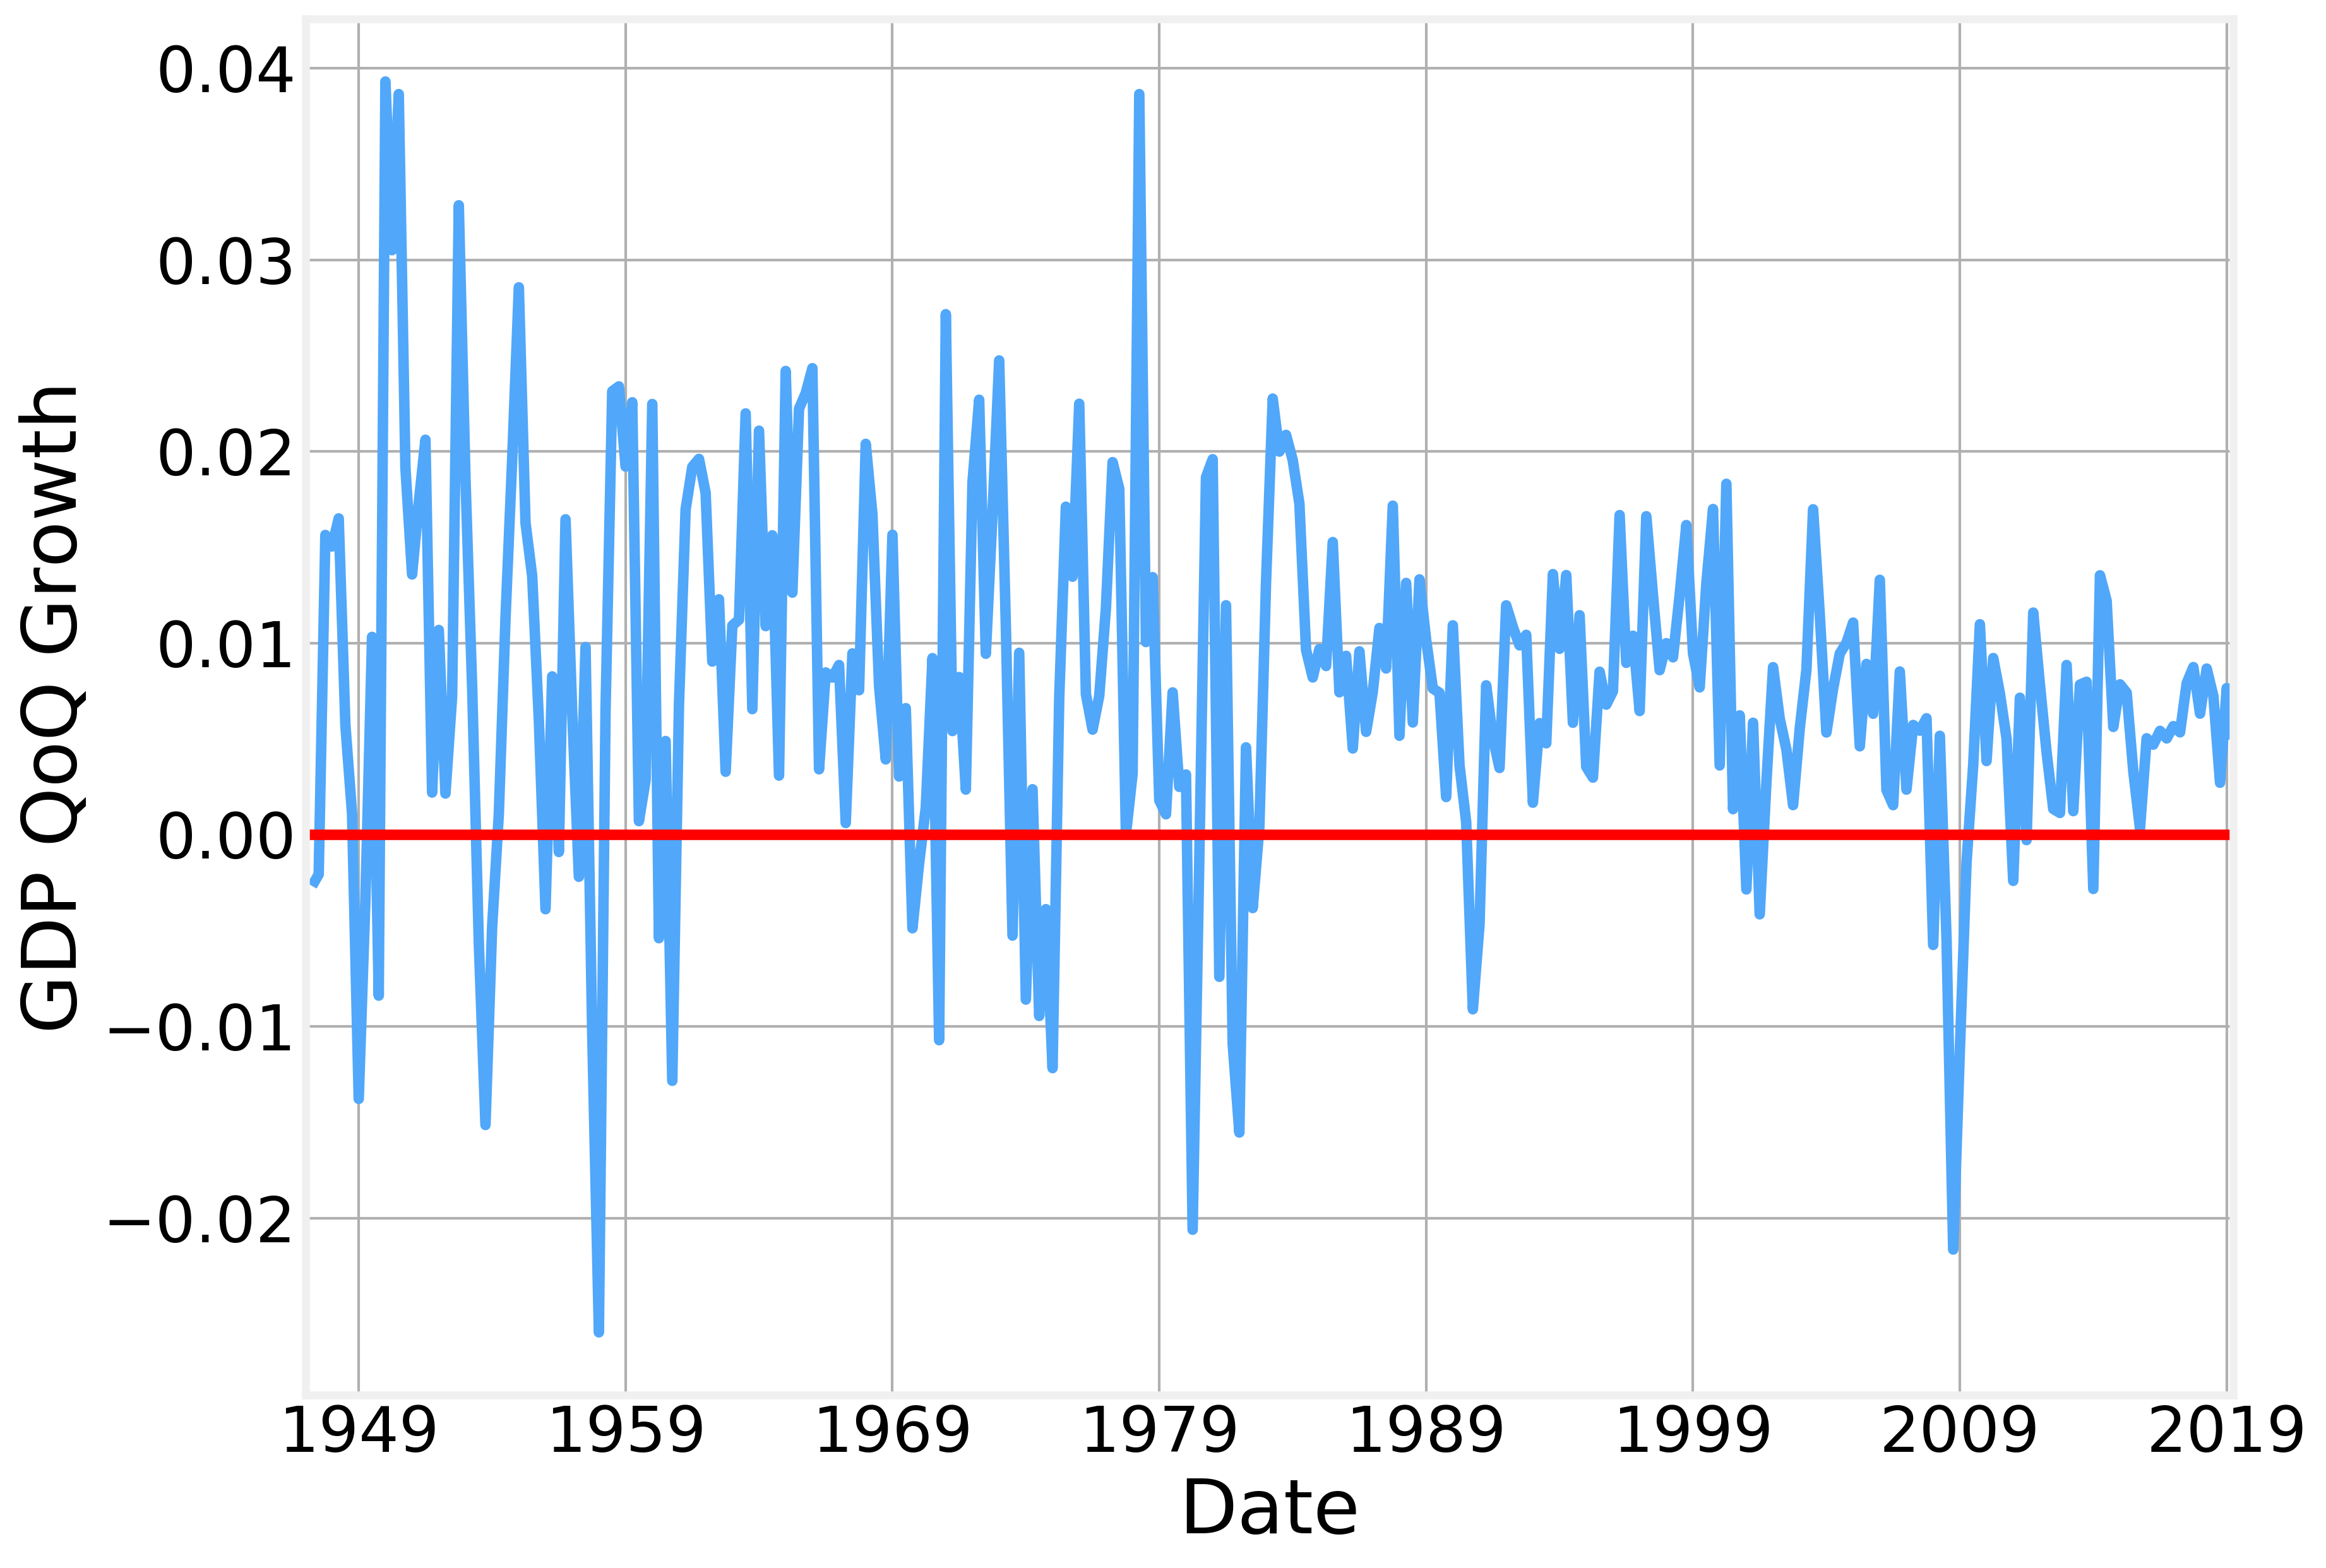

In [6]:
ax = series['GDP'].pct_change().plot()
ax.plot([series.index.min(), series.index.max()], [0, 0], 'r-')
ax.set_xlabel('Date')
ax.set_ylabel('GDP QoQ Growth');

## Autocorrelation function

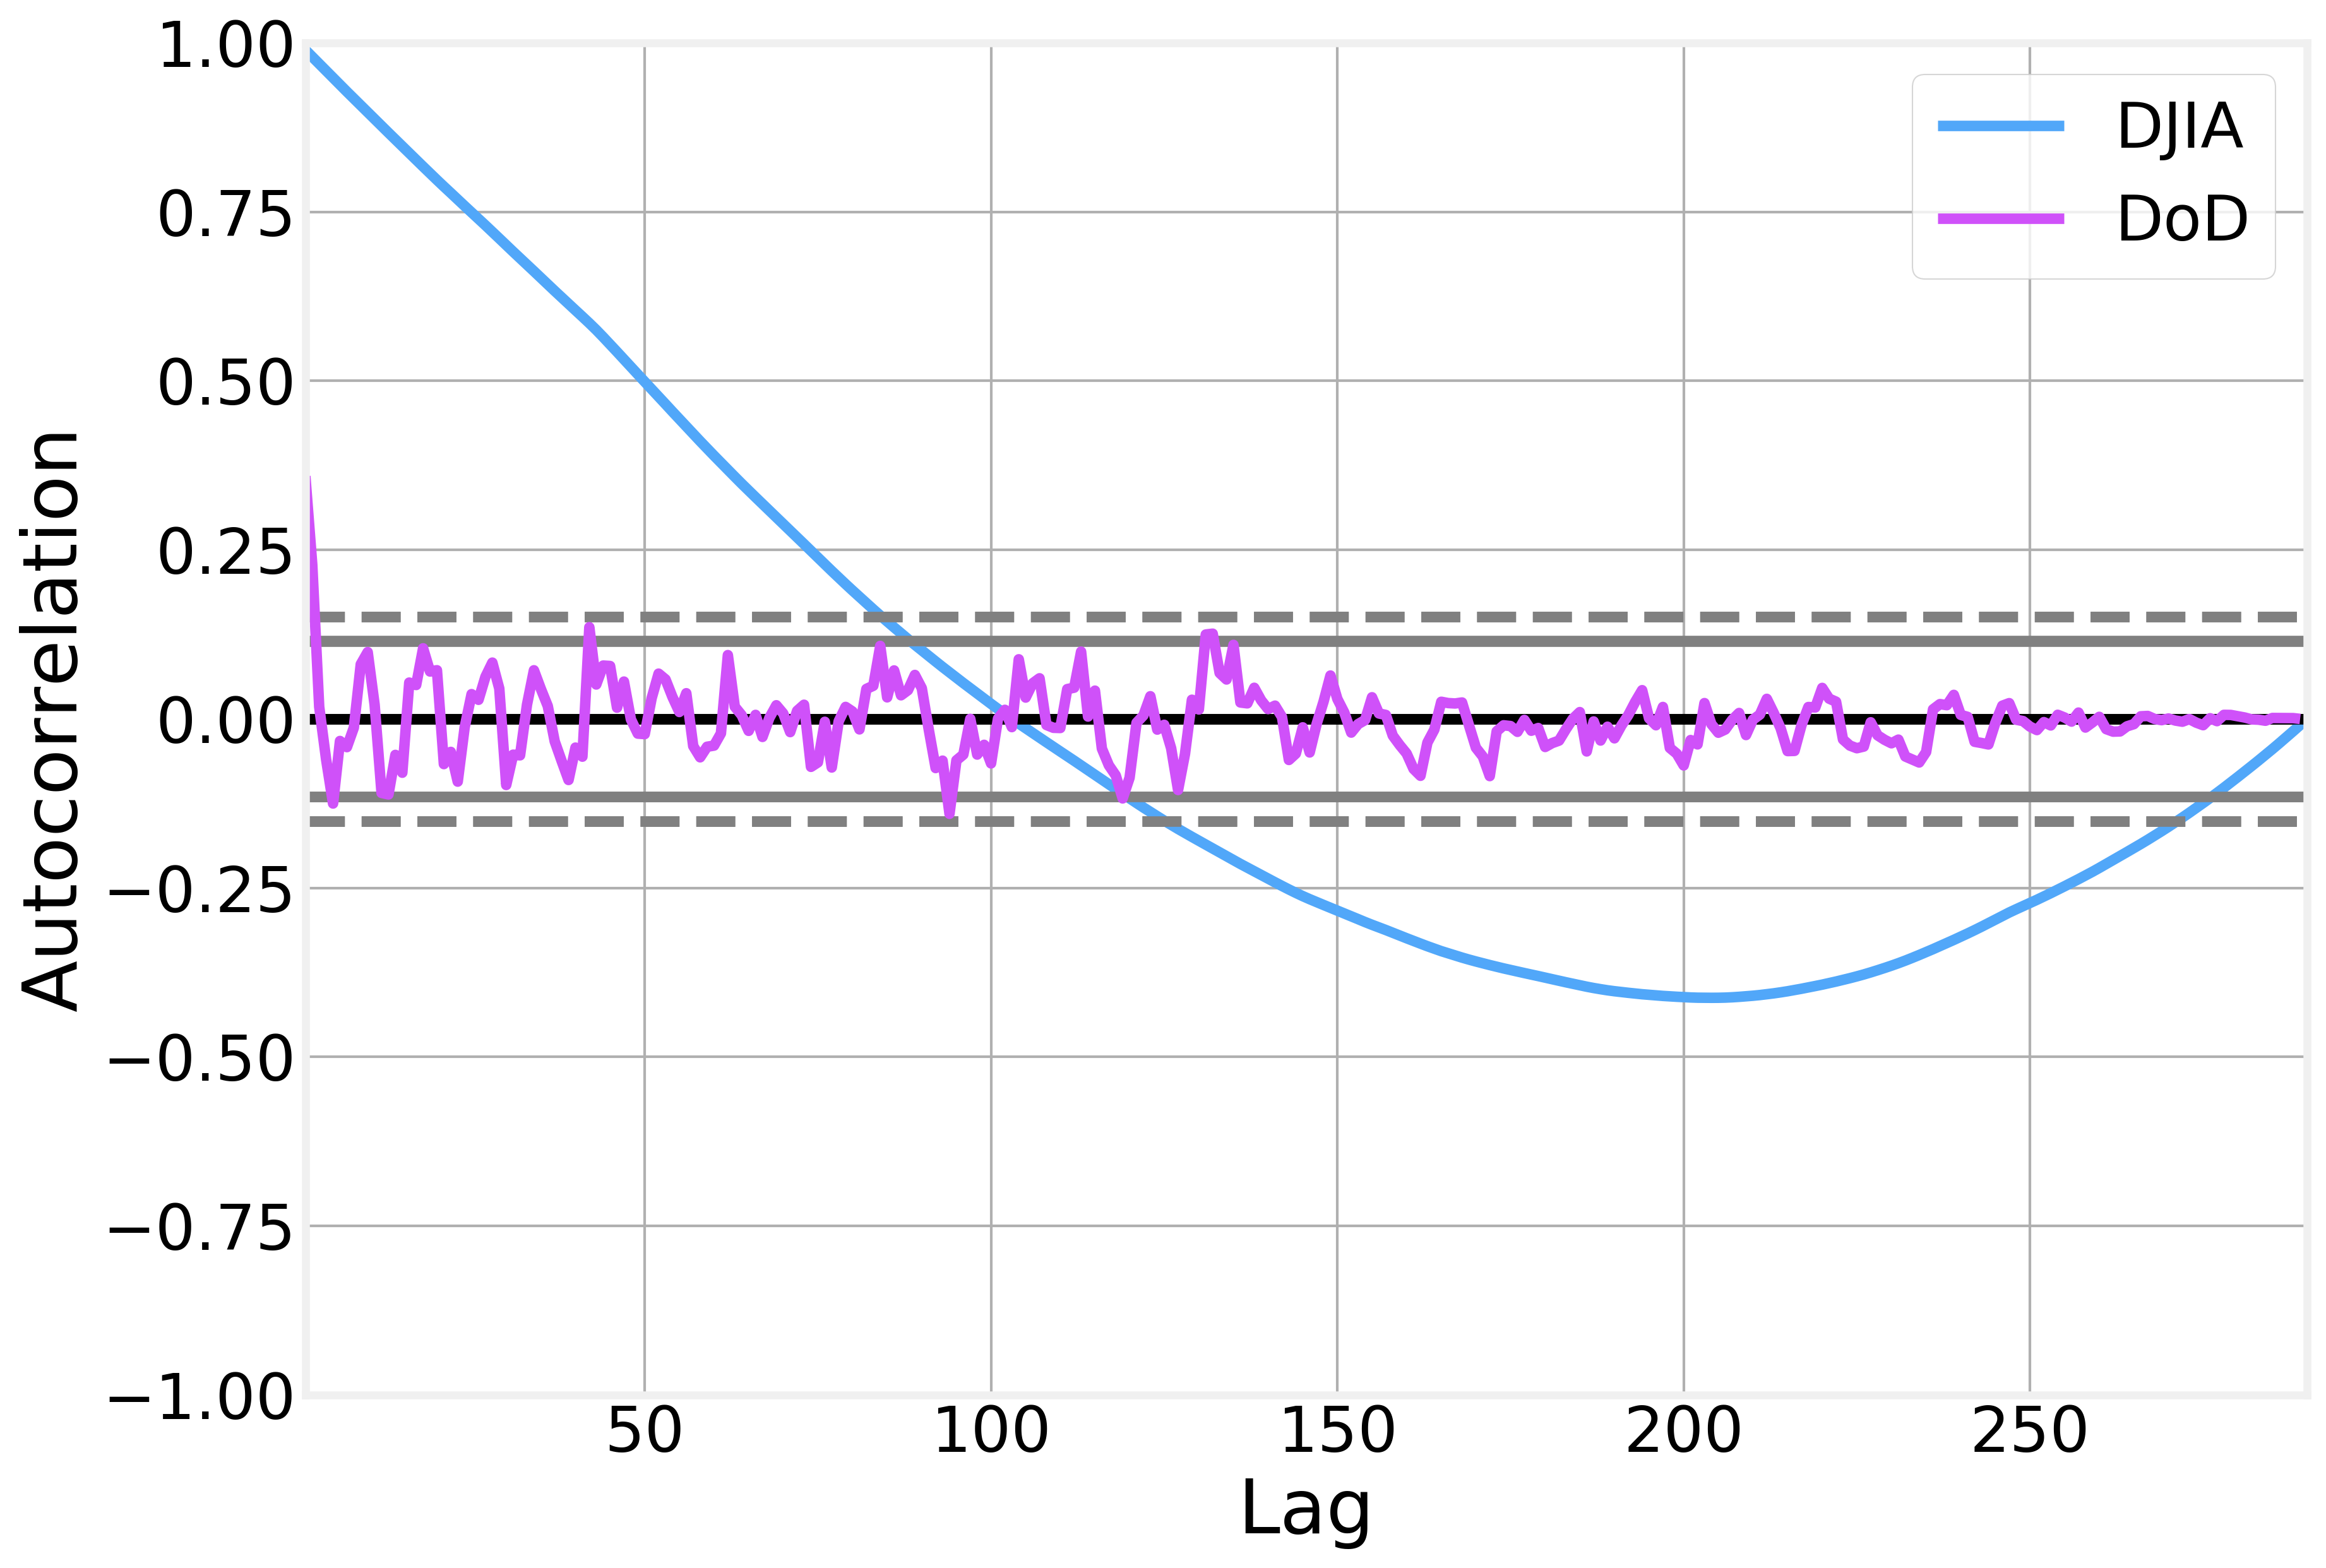

In [7]:
ax = autocorrelation_plot(series, label='DJIA')
autocorrelation_plot(series.pct_change().dropna(), ax=ax, label='DoD')

In [8]:
values = series.pct_change().dropna().values.reshape(-1, 1)
X = values[:-1]
y = values[1:]

Text(0, 0.5, 'x_t+1')

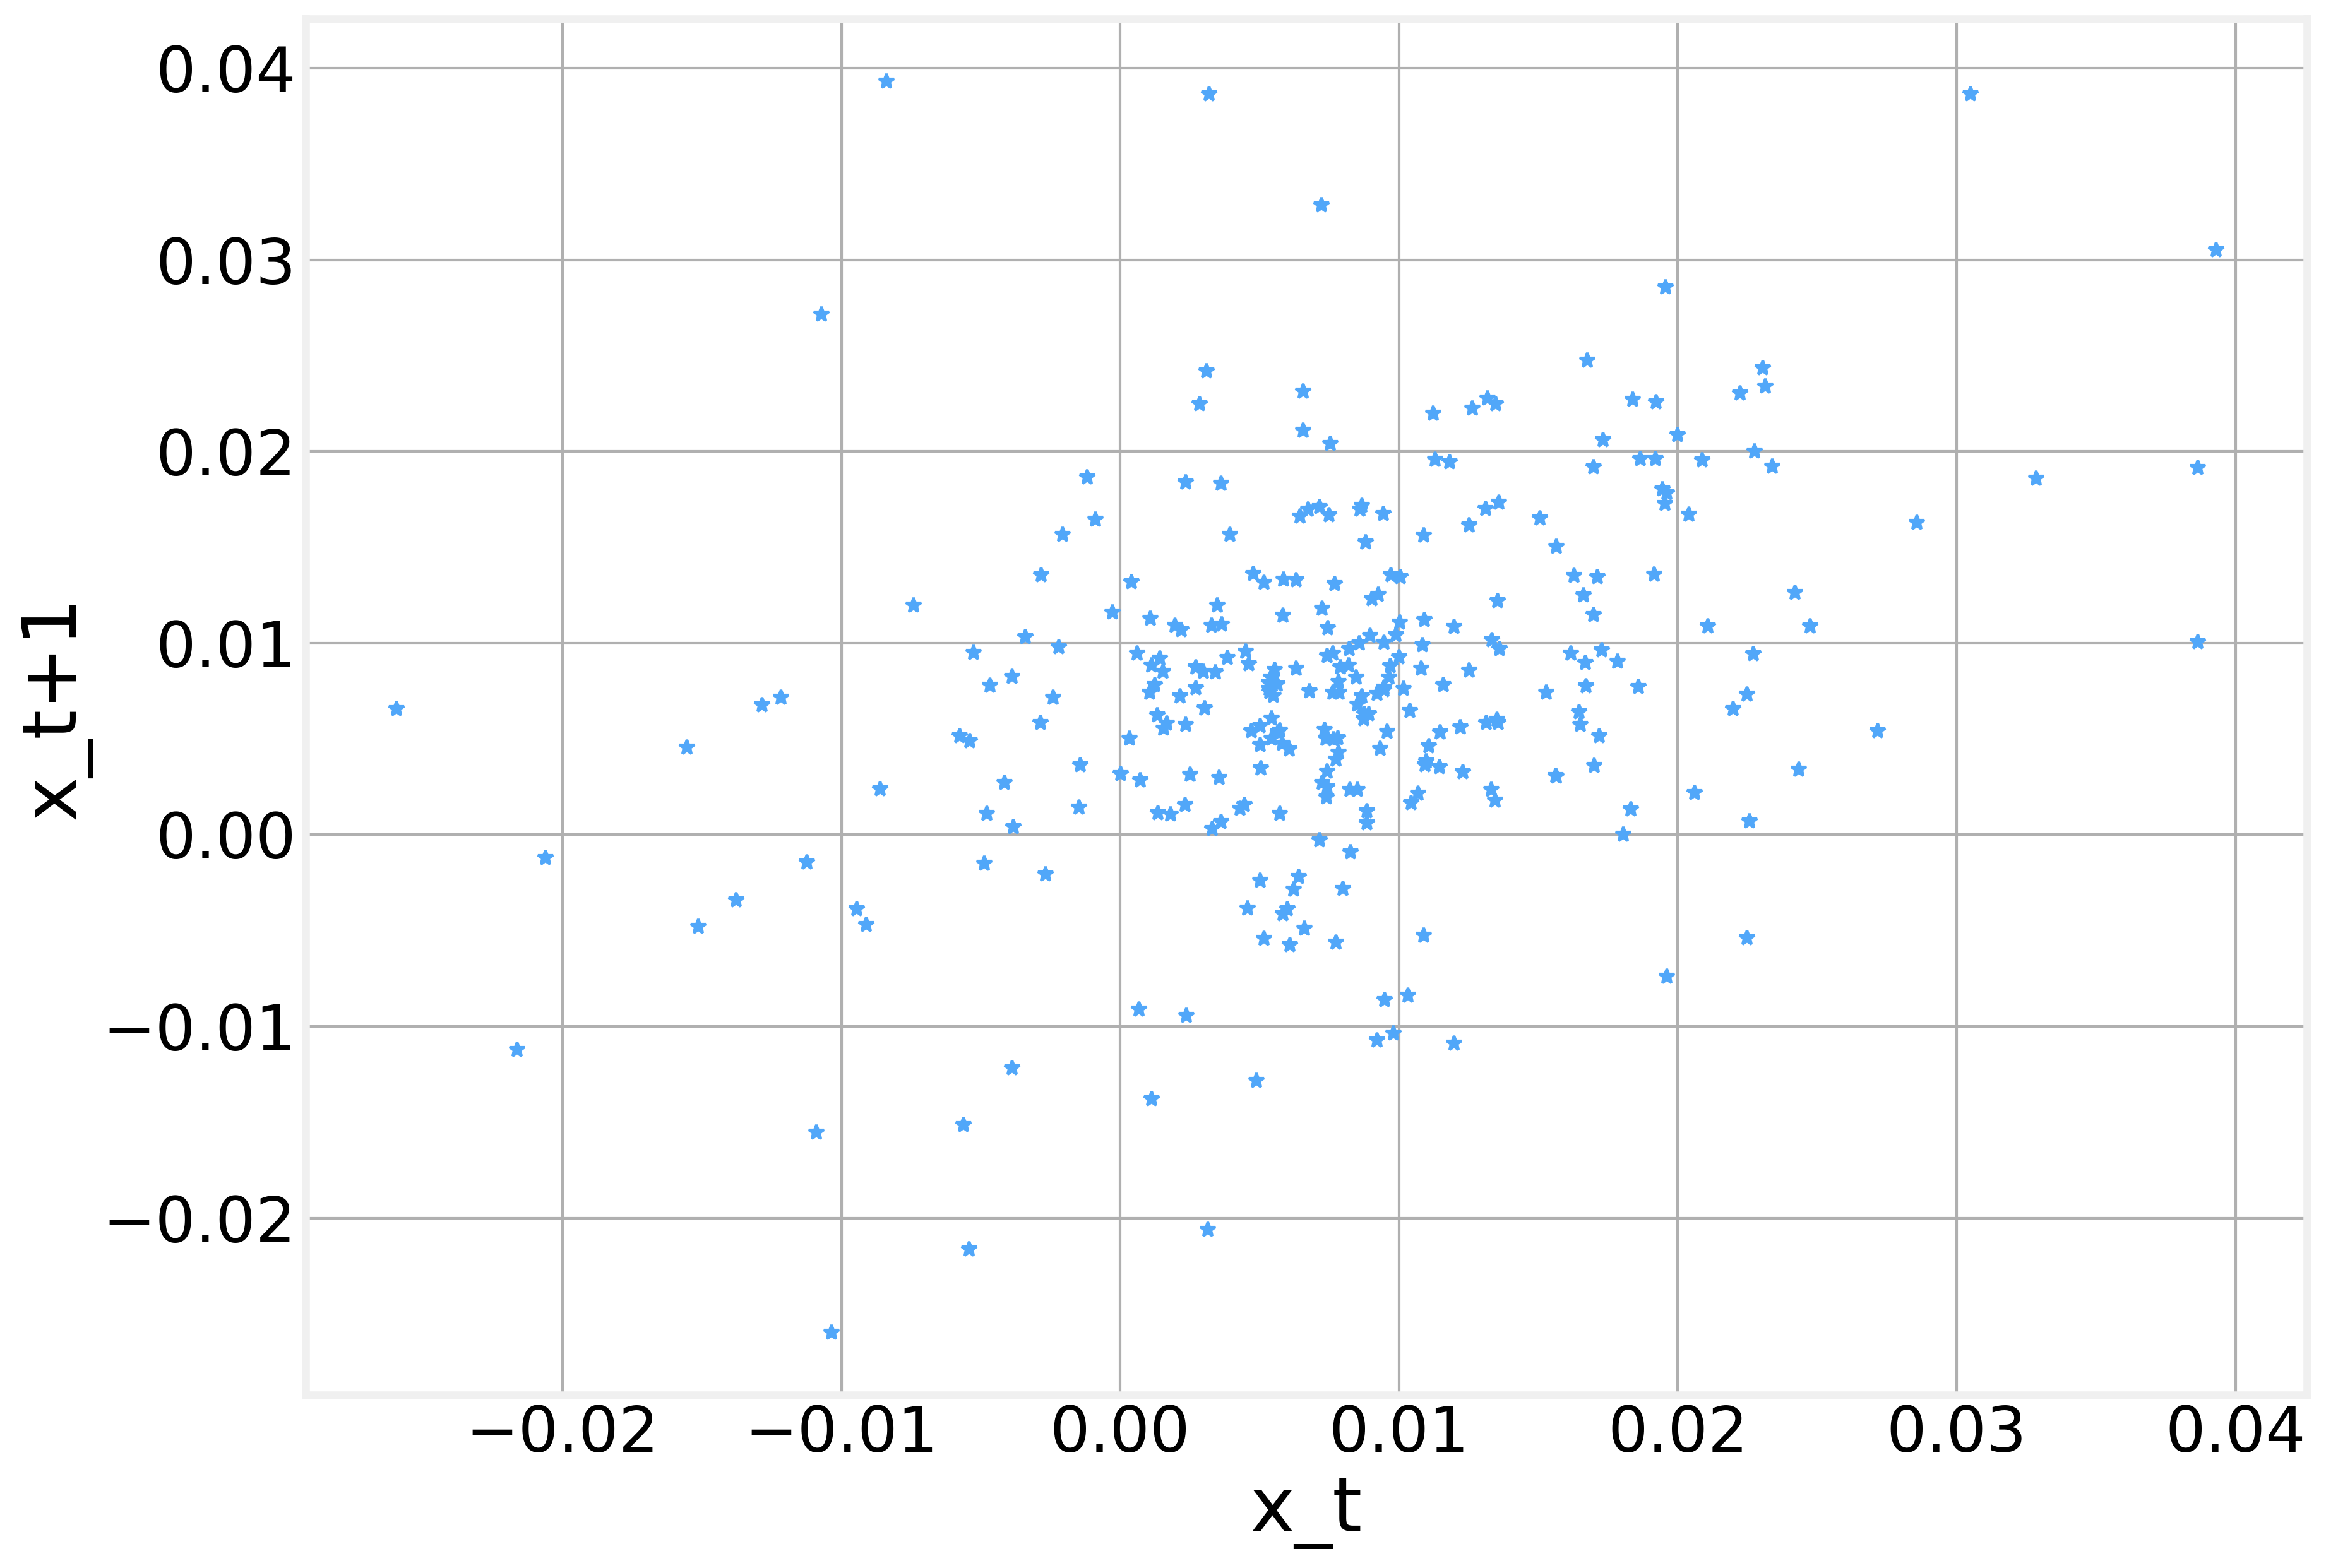

In [9]:
plt.plot(X.flatten(), y, '*')
plt.xlabel('x_t')
plt.ylabel('x_t+1')

In [10]:
lm = LinearRegression()

In [11]:
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_pred = lm.predict(X)

## Fit comparison

Text(0, 0.5, 'GDP (B$)')

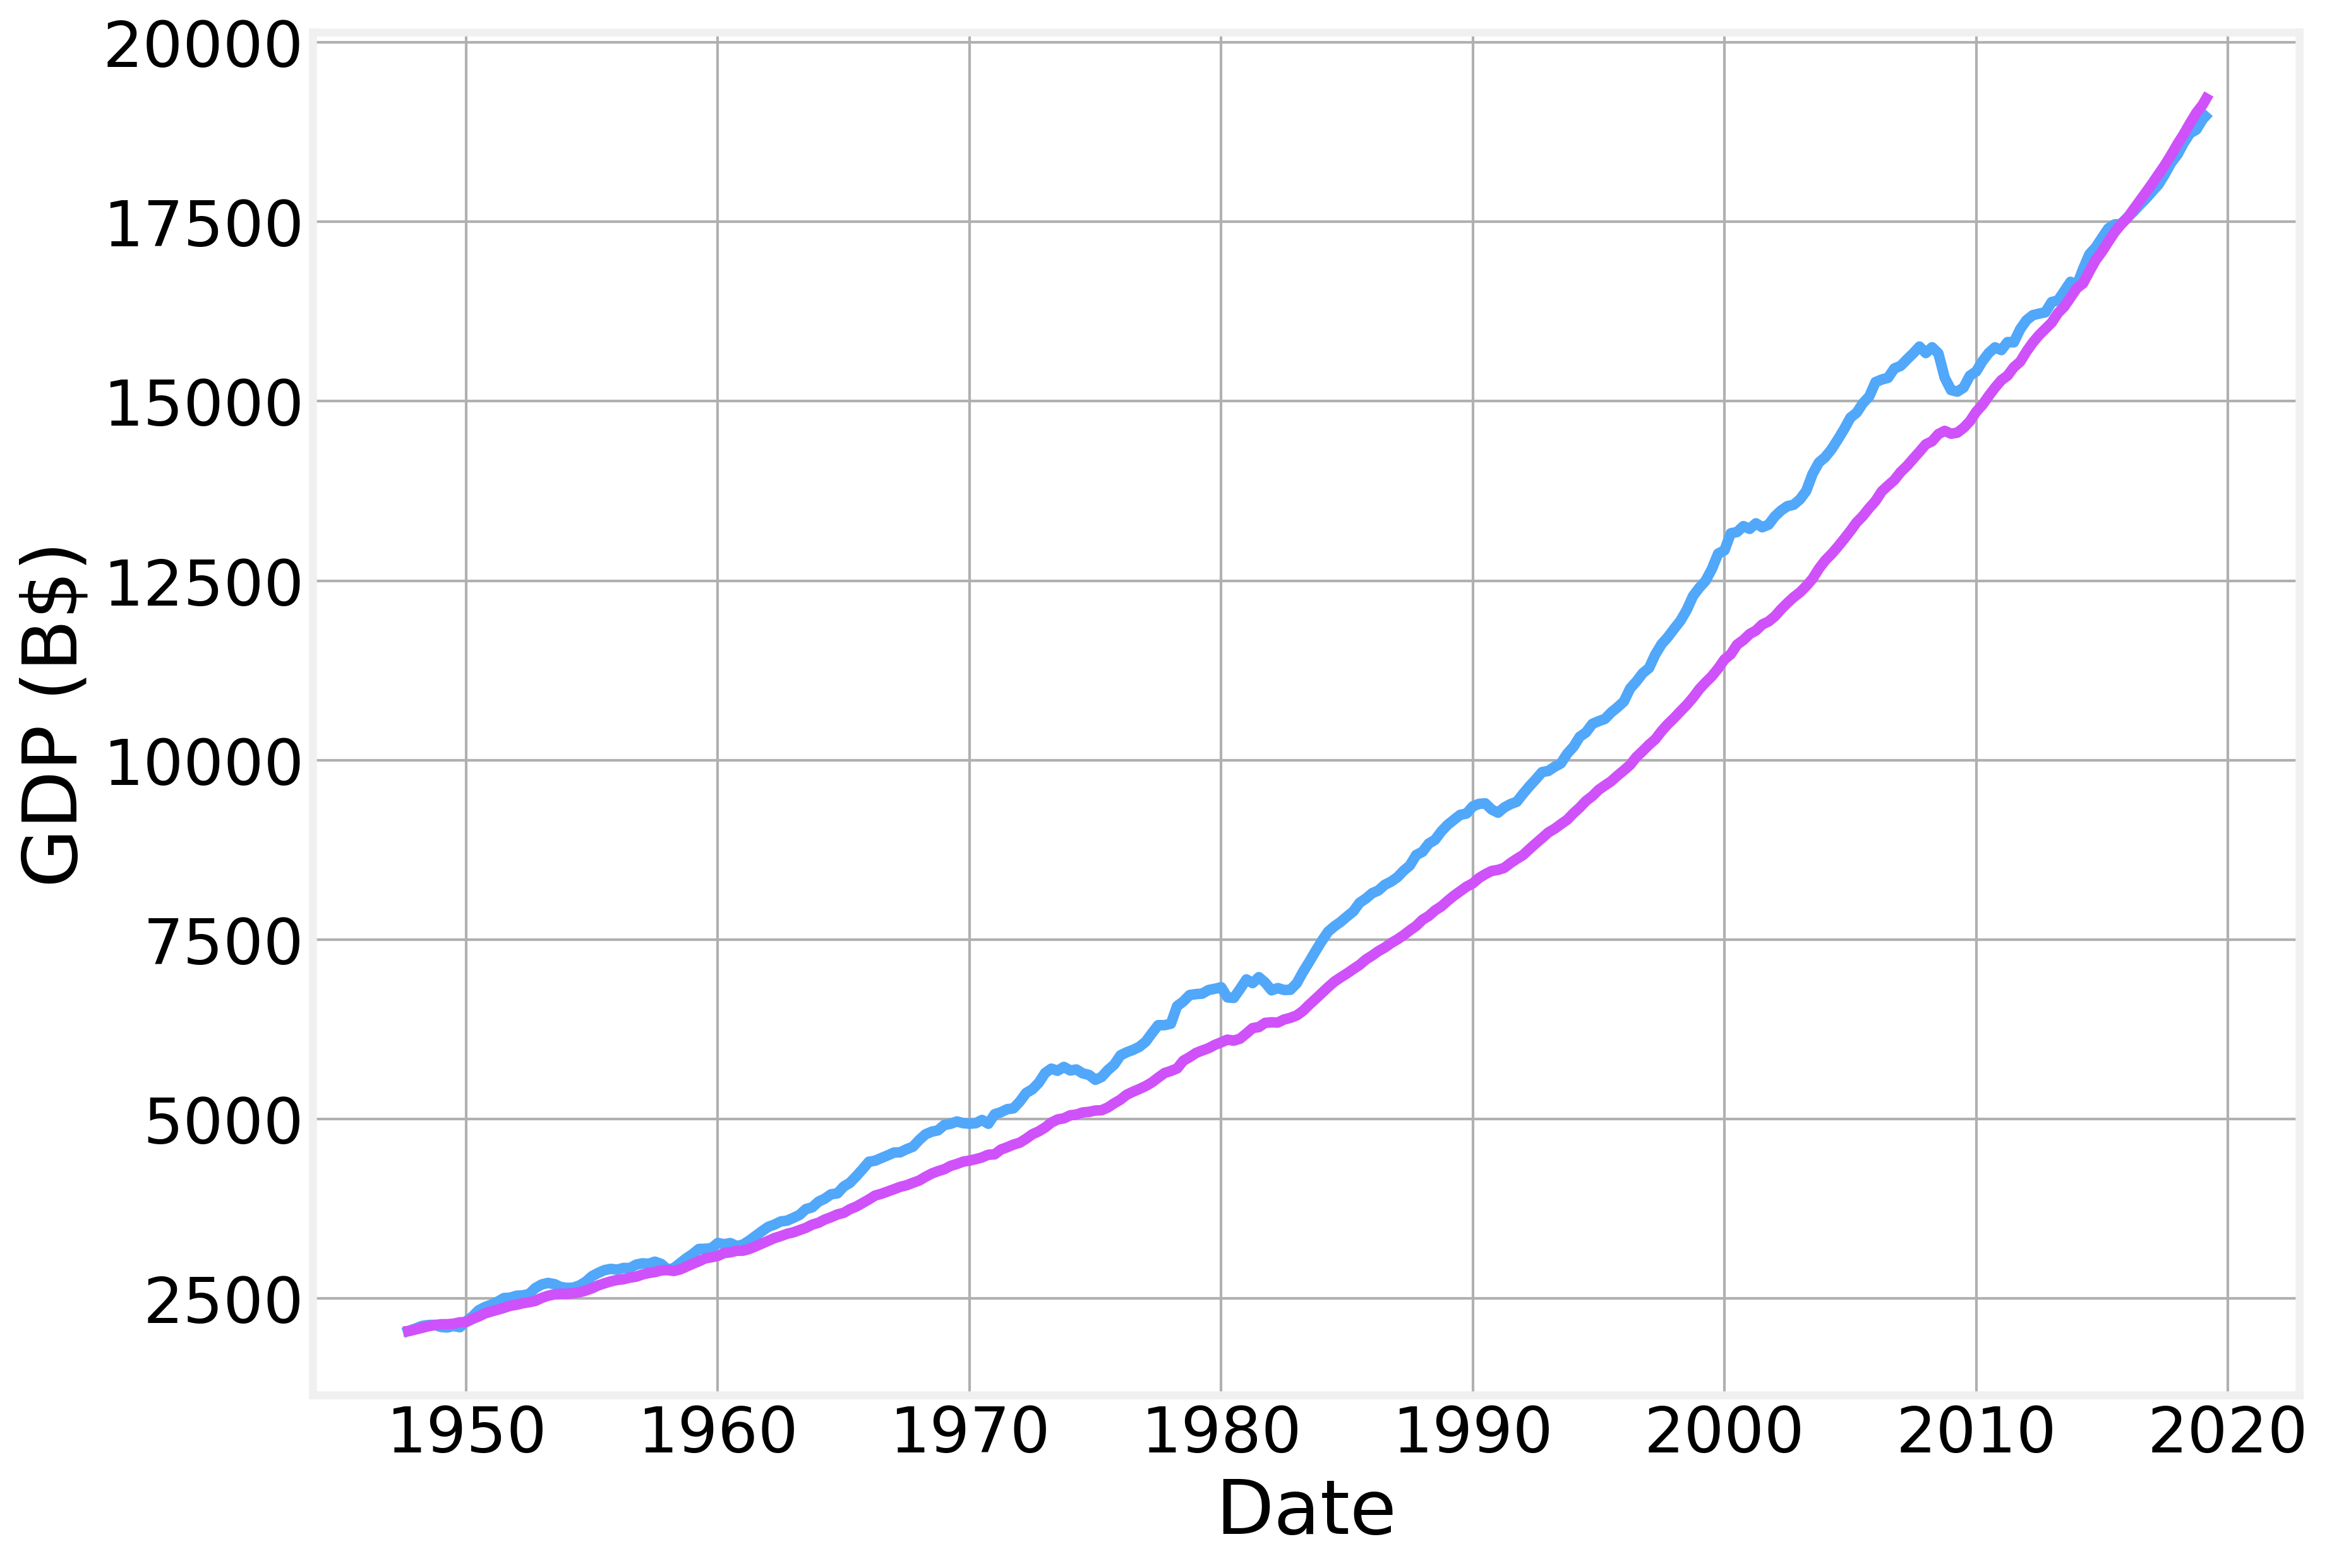

In [13]:
plt.plot(series.index[2:], series.values[2:], )
plt.plot(series.index[2:], (1+y_pred).cumprod()*series.values[0])
plt.xlabel('Date')
plt.ylabel('GDP (B$)')

## Now without looking into the future

In [14]:
n_points = len(series)
train_points = int(2/3*n_points)+1

In [15]:
X_train = X[:train_points]
y_train = y[:train_points]
X_test = X[train_points:]
y_test = y[train_points:]

In [16]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

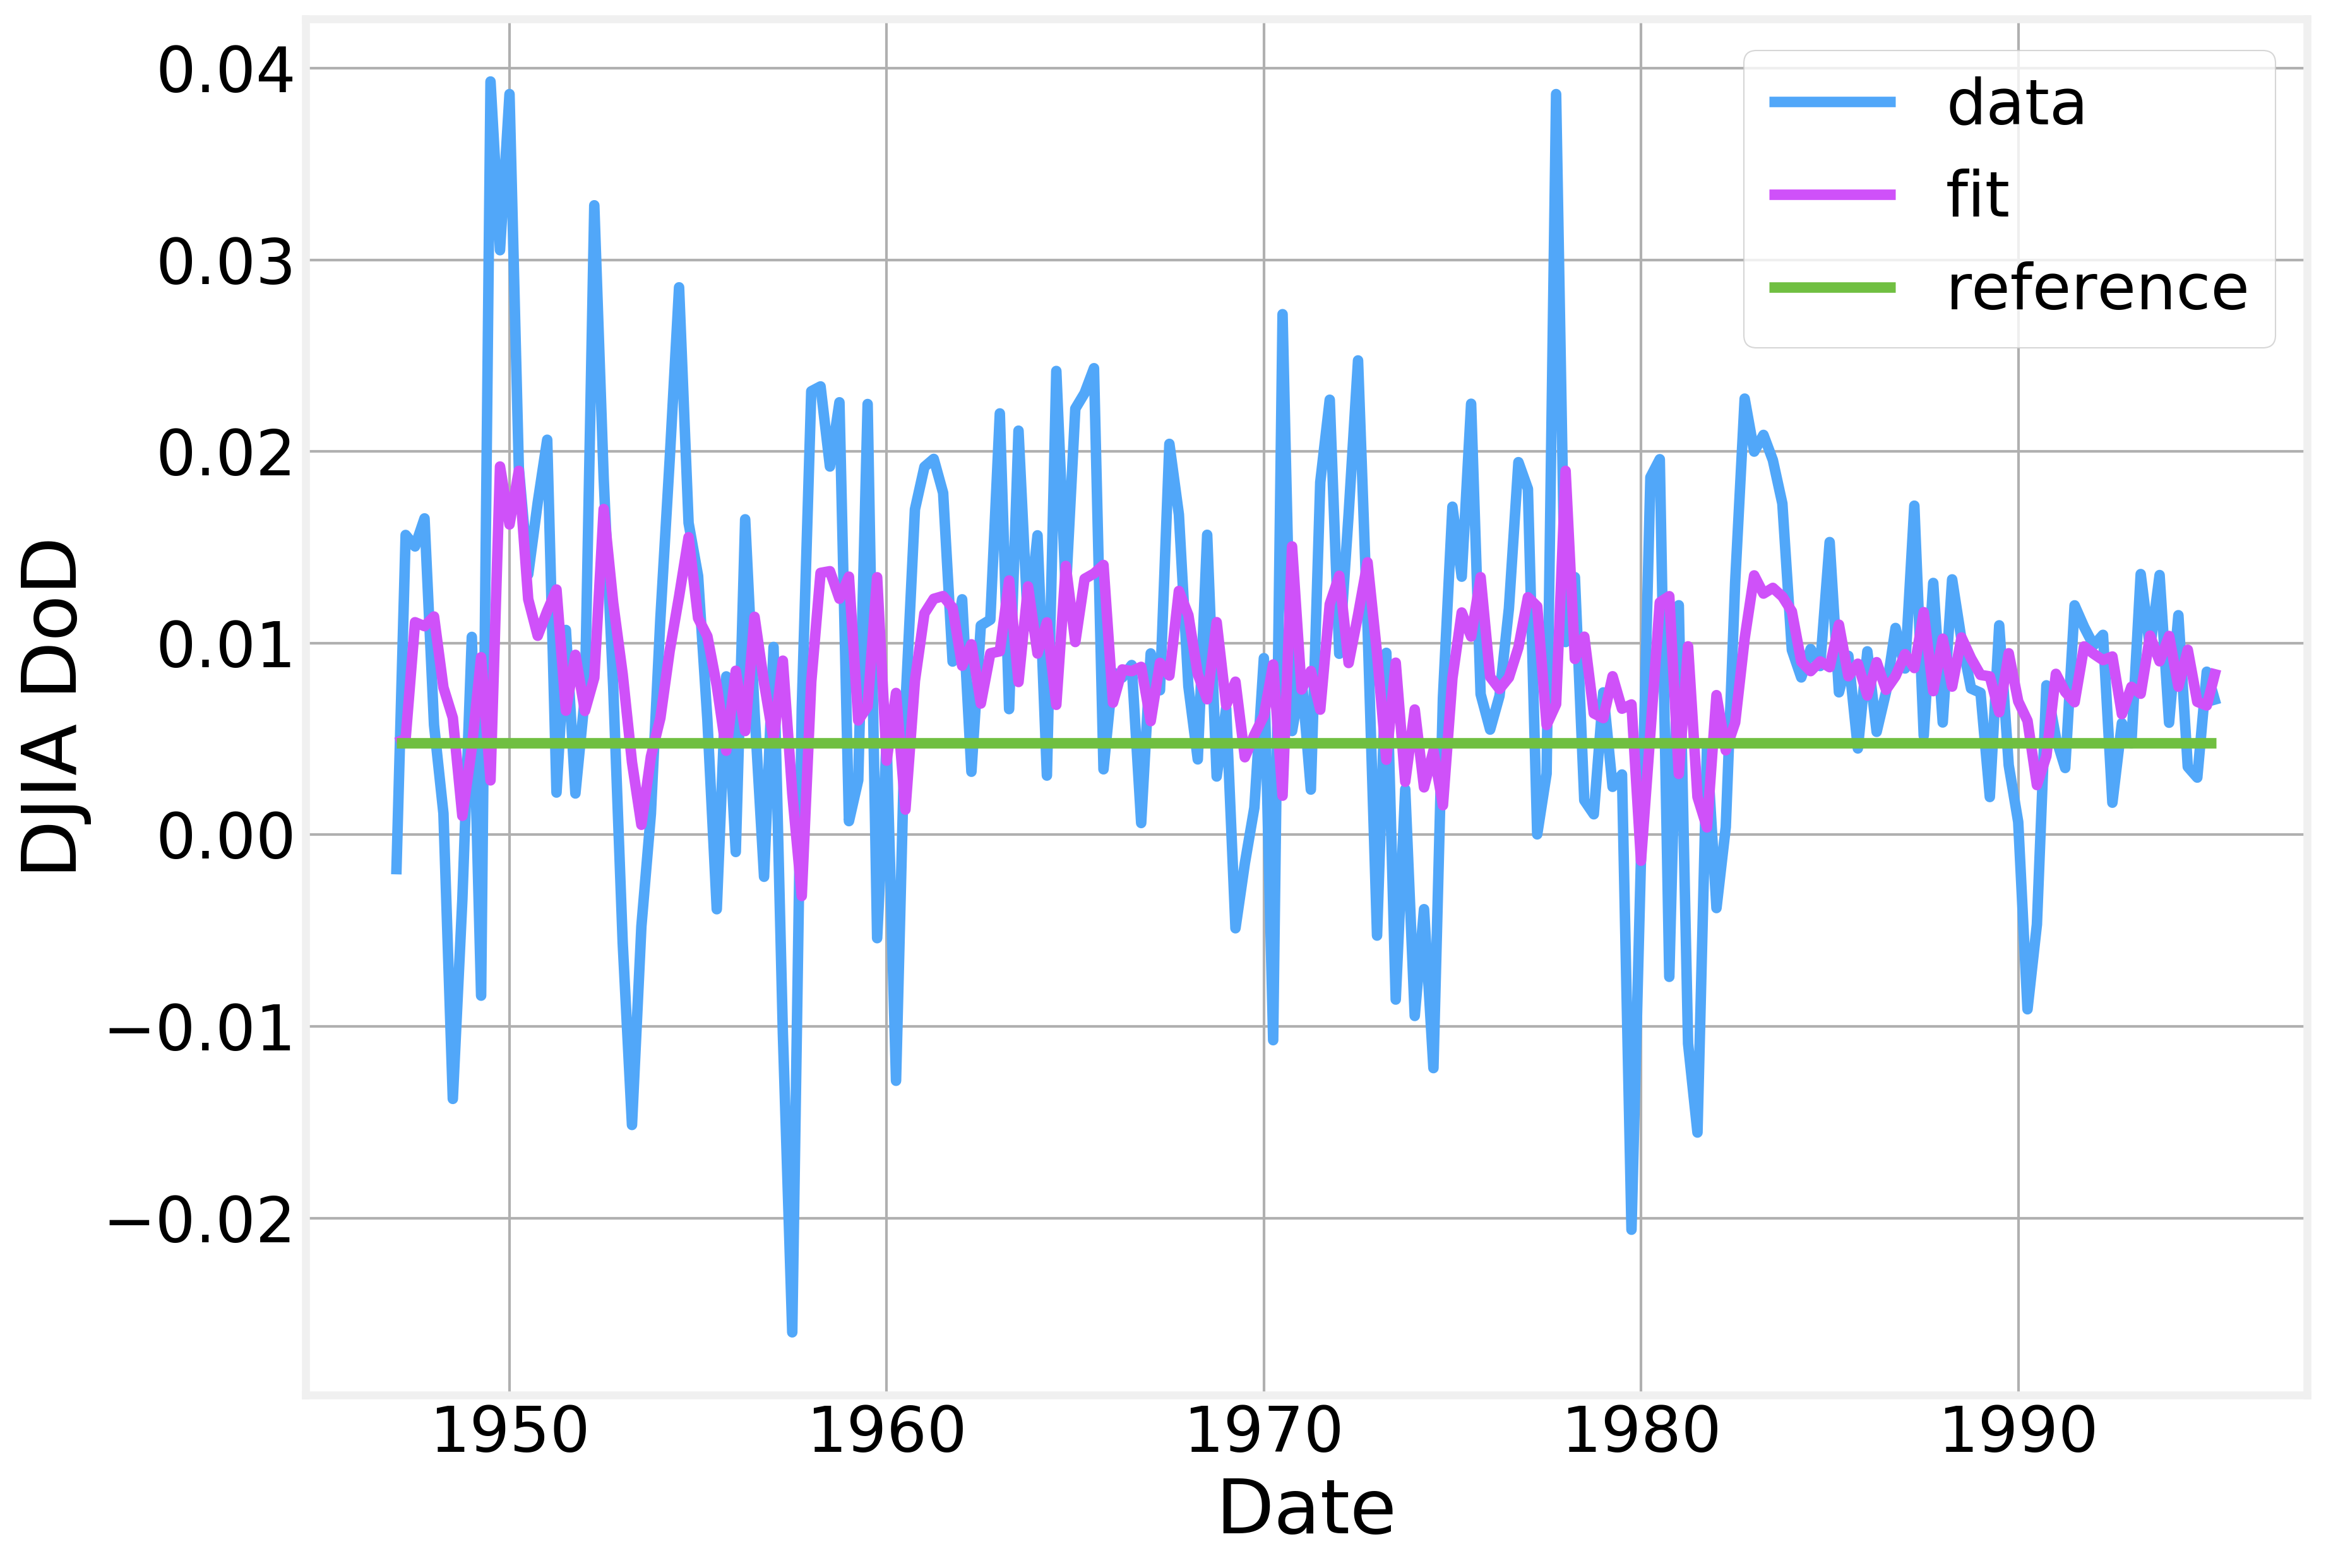

In [18]:
plt.plot(series.index[:train_points], y_train, label='data')
plt.plot(series.index[:train_points], y_train_pred, label='fit')
plt.plot(series.index[:train_points], y_train_pred*0+y_train_pred[0], label='reference')
plt.xlabel('Date')
plt.ylabel('DJIA DoD')
plt.legend()

## Comparison plot

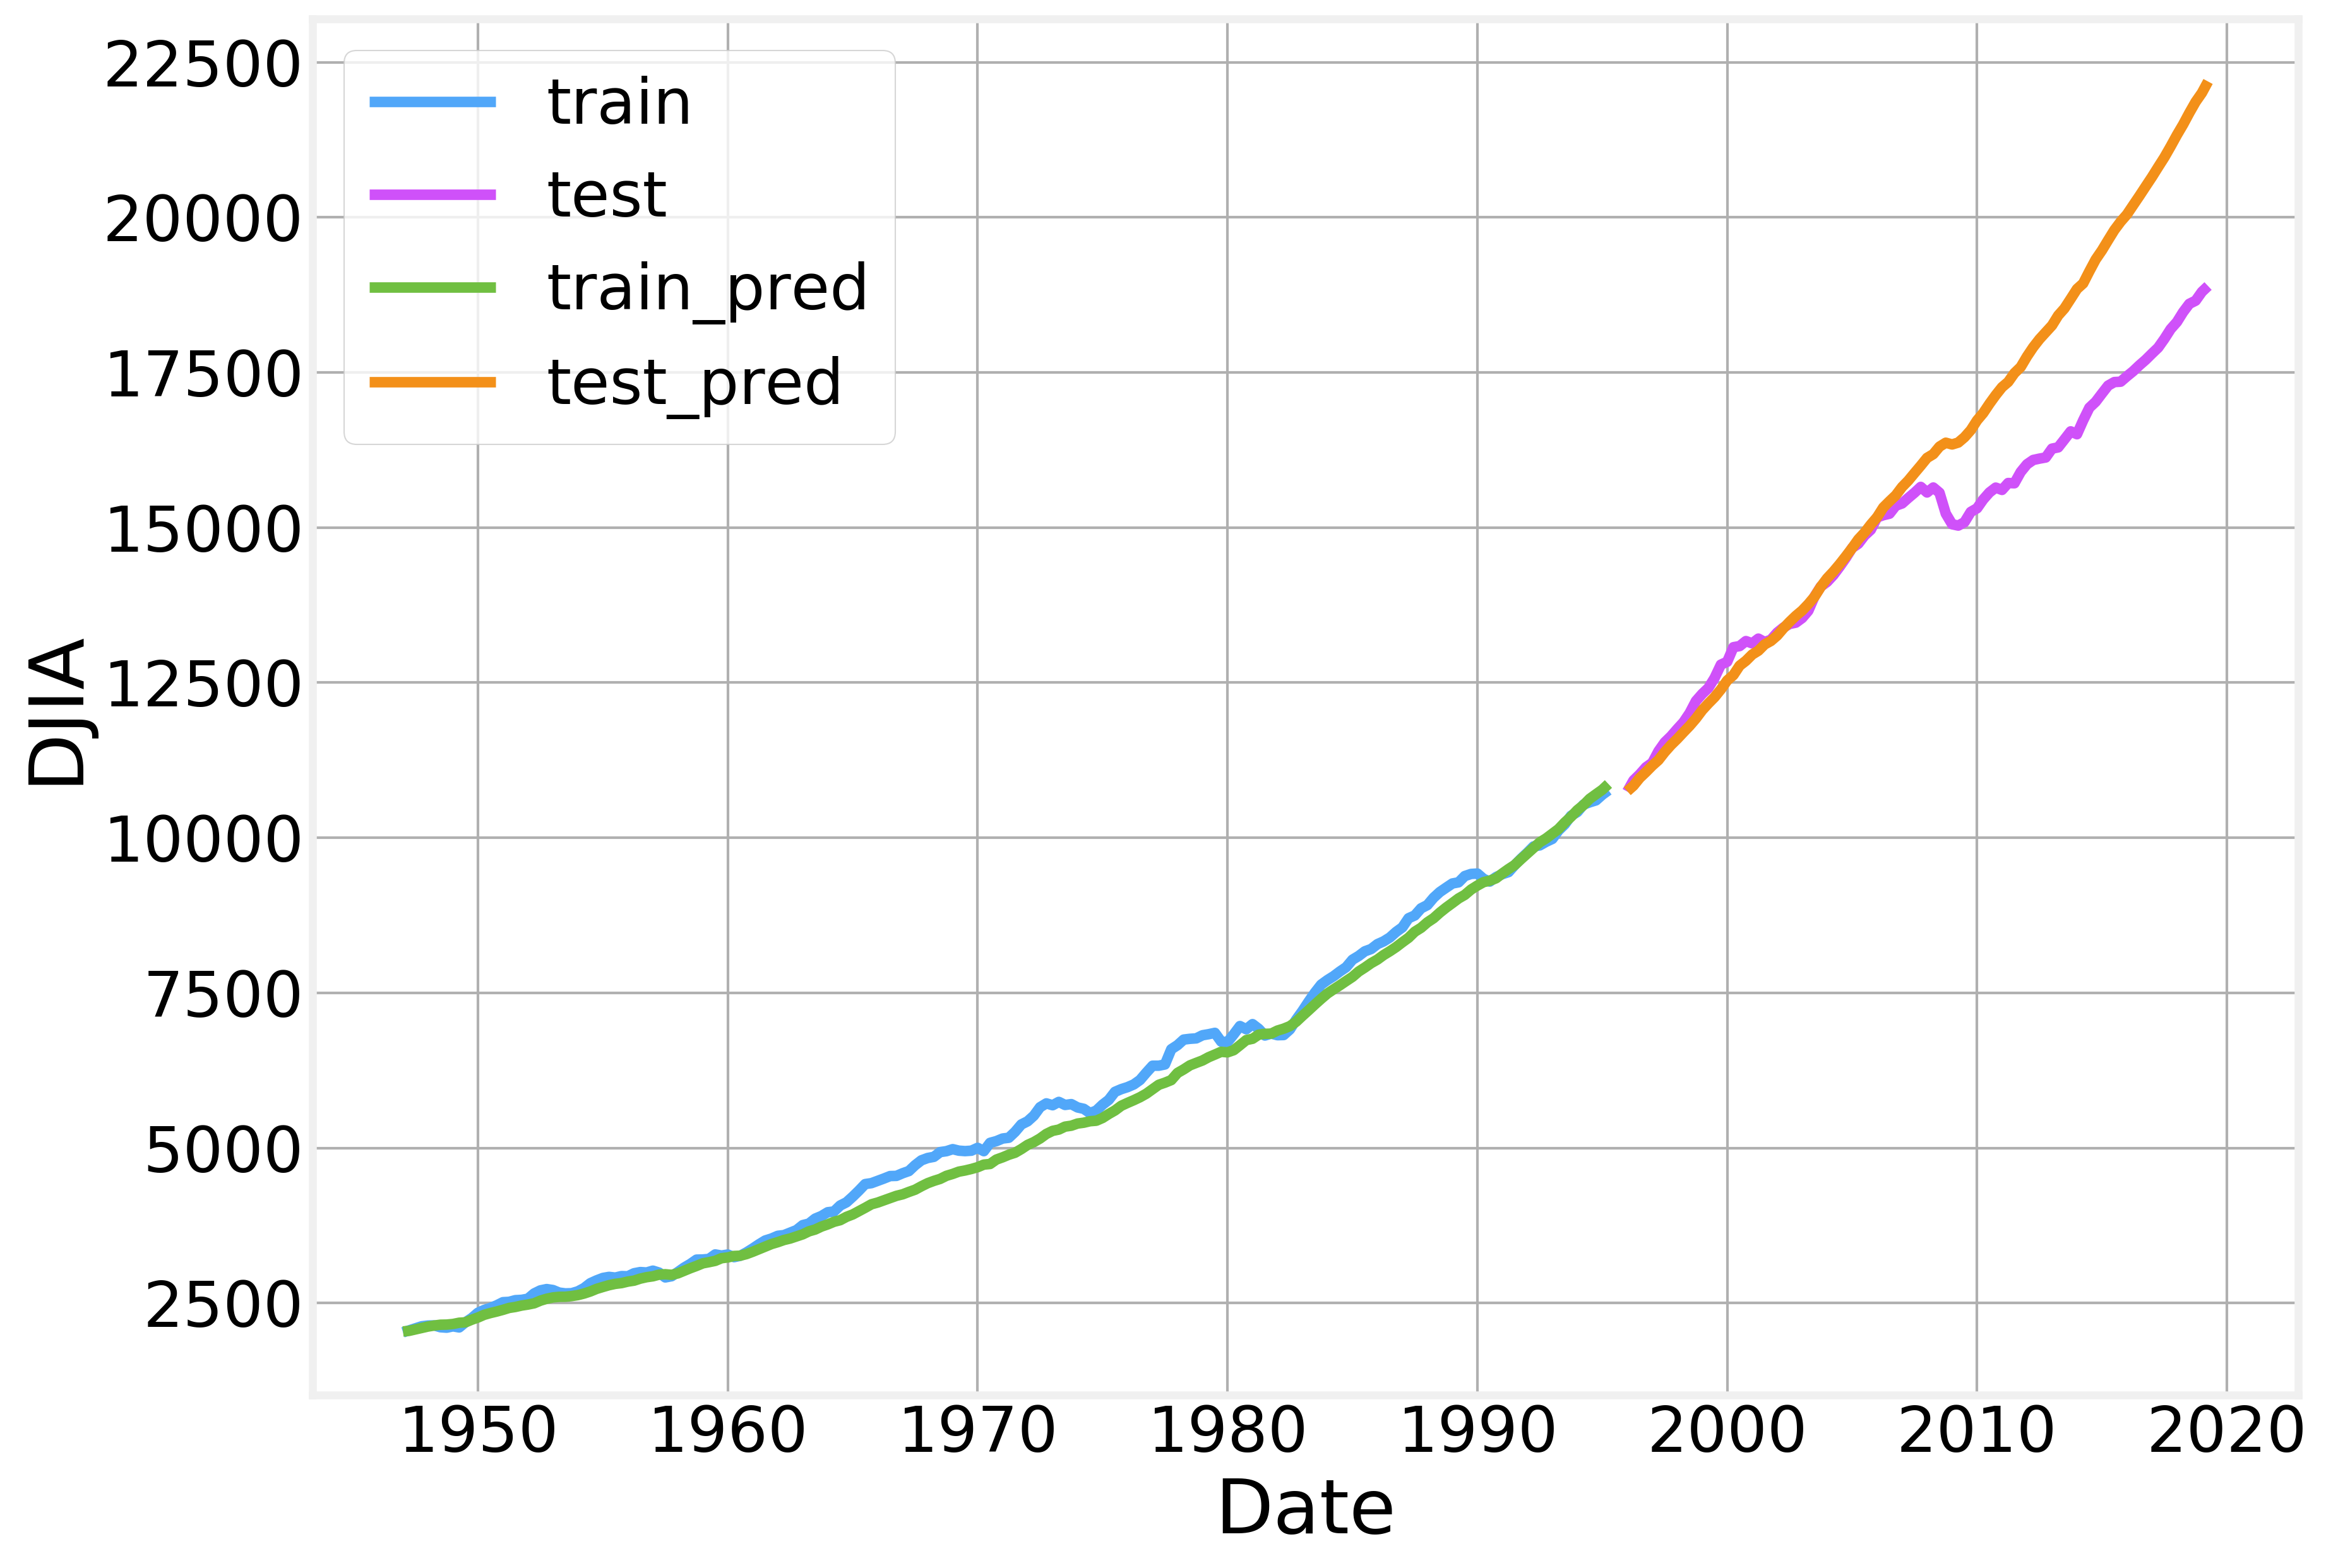

In [19]:
plt.plot(series.index[:train_points], (1+y_train).cumprod()*series.values[0], label='train')
plt.plot(series.index[train_points+2:], (1+y_test).cumprod()*series.values[train_points], label='test')
plt.plot(series.index[:train_points], (1+y_train_pred).cumprod()*series.values[0], label='train_pred')
plt.plot(series.index[train_points+2:], (1+y_test_pred).cumprod()*series.values[train_points], label='test_pred')
plt.xlabel('Date')
plt.ylabel('DJIA')
plt.legend()

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>